Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 3, 64, 64])


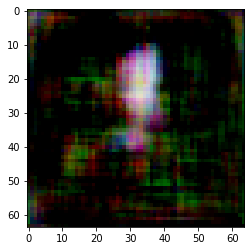

In [6]:
import torch
from model import STAGE1_G as G1
from model import STAGE2_G as G2
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

generator = G1()
path_pretrained = '../birds_stageI_2020_11_17_21_11_29/Model/netG_epoch_1.pth'
generator.load_state_dict(torch.load(path_pretrained, map_location='cuda:0'))
generator.cuda()

batchsize = 1
nz = 100
with torch.no_grad():
    generator.eval()
    noise = Variable(torch.FloatTensor(batchsize, nz)).cuda()
    noise.data.normal_(0, 1)
    #noise = noise.cuda()
    input = torch.rand(batchsize, 1024)
    input = input.cuda()
    _, fake_img, mu, logvar = generator(input, noise)
    print(fake_img.shape)
    plt.imshow(fake_img[0].permute(1,2,0).cpu())
